<a href="https://colab.research.google.com/github/Gehlen05/sms-classifier-senior-sistemas/blob/main/sms_classifier_estatisticas_senior_sistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

### Leitura arquivo
Projeto foi montado para rodar no colab, podendo ser rodado em outras interfaces. Porem deve se atentar aos diretorios. Para o projeto executar corretamente o arquivo sms_senior.csv devera estar na pasta do drive Colab Notebooks junto com o projeto. Caso opte por rodar na maquina no jupyter devera ser mudado o caminho.

In [33]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sms_senior.csv',  encoding= 'unicode_escape', delimiter=',')
df.head()

Mounted at /content/drive


,Full_Text,got,great,wat,free,text,txt,win,already,dun,...,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam
0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,12,2017-01-01 00:08:00,no
1,"came to look at the flat, seems ok, in his 50s...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,23,2017-01-01 00:19:00,no
2,Urgent! call 09061749602 from Landline. Your c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,25,2017-01-01 01:53:00,yes
3,Do you hide anythiing or keeping distance from me,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,2017-01-01 02:14:00,no
4,"Actually, my mobile is full of msg. And i m do...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,29,2017-01-01 02:25:00,no


Checando se a valores nulos

In [34]:
df.isnull().sum().max()

0

Mapa de balanceamento da coluna IsSpam


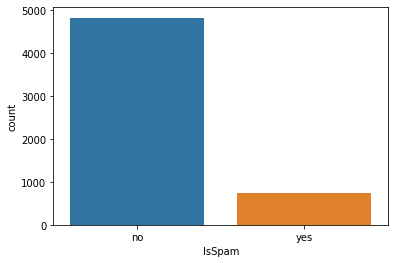

In [35]:
ax = sns.countplot(x='IsSpam',data=df)

### Mapa nuvem para palavras com mais repetições,

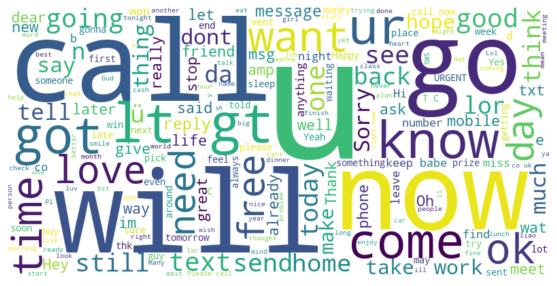

In [36]:
mapa_nuvem = WordCloud(background_color='white', width=800, height=400).generate(''.join(df.Full_Text))
plt.figure(figsize=(20, 5))
plt.imshow(mapa_nuvem, interpolation='bilinear')
plt.axis("off")
plt.show()

### Copiado dataframe original jundo com a eclusão de colunas.
Valores agrupados para somatorio.
Valores somados.

In [37]:
df_sum = df.copy()
df_sum.drop(['Full_Text', 'Common_Word_Count', 'Word_Count', 'Date', 'IsSpam'], axis=1, inplace=True)
valores_agrupados = df_sum.groupby(list(df_sum.columns)).sum(list(df_sum.columns)).reset_index()
valores_agrupados_somados = valores_agrupados.sum().sort_values(ascending=False)

<ipython-input-37-1a6f70544c18>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  valores_agrupados = df_sum.groupby(list(df_sum.columns)).sum(list(df_sum.columns)).reset_index()


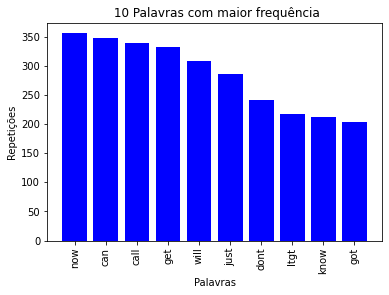

In [38]:
plt.bar(valores_agrupados_somados.keys()[:10], valores_agrupados_somados[:10] , color = 'blue')
plt.ylabel("Repetições")
plt.xlabel("Palavras")
plt.xticks(rotation=90)
plt.title(" 10 Palavras com maior frequência")
plt.show()

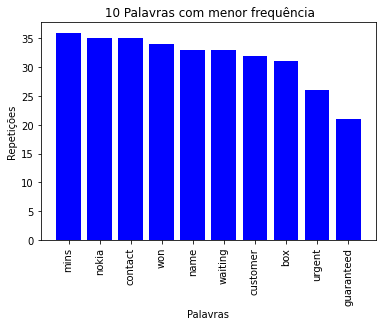

In [39]:
plt.bar(valores_agrupados_somados.keys()[-10:], valores_agrupados_somados[-10:] , color = 'blue')
plt.ylabel("Repetições")
plt.xlabel("Palavras")
plt.xticks(rotation=90)
plt.title(" 10 Palavras com menor frequência")
plt.show()

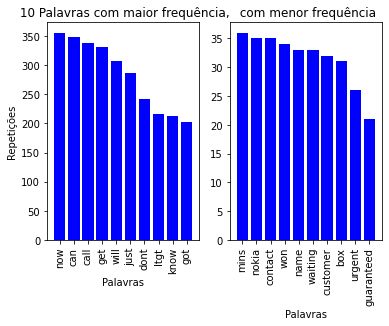

In [40]:
plt.subplot(1, 2, 1)
plt.bar(valores_agrupados_somados.keys()[:10], valores_agrupados_somados[:10] , color = 'blue')
plt.ylabel("Repetições")
plt.xlabel("Palavras")
plt.xticks(rotation=90)
plt.title(" 10 Palavras com maior frequência,")

plt.subplot(1, 2, 2)
plt.bar(valores_agrupados_somados.keys()[-10:], valores_agrupados_somados[-10:] , color = 'blue')
plt.xlabel("Palavras")
plt.xticks(rotation=90)
plt.title(" com menor frequência")
plt.show()


In [41]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

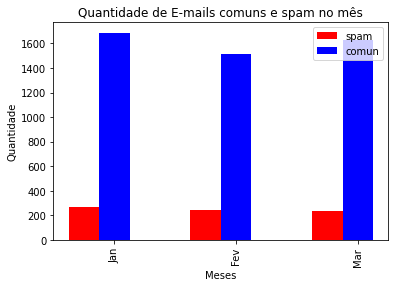

In [42]:
meses_ano  = {'01':'Jan','02':'Fev','03':'Mar','04':'Abr','05':'Maio',
              '06':'Jun','07':'Jul','08':'Ago','09':'Set','10':'Out',
              '11':'Nov','12':'Dez'}
meses = {}
for posicao in range(1,len(df["Date"])):
  data = df.Date[posicao]
  mes = data[5:7]
  classificacao = df.IsSpam[posicao]
  meses.setdefault(mes, []).append(classificacao)

meses_grafico = []
quantidade_email_spam = []
quantidade_email_comun = []
for mes, quantidade in meses.items():
  meses_grafico.append(meses_ano[mes])
  quantidade_email_spam.append(quantidade.count("yes"))
  quantidade_email_comun.append(quantidade.count("no"))

barWidth = 0.25
r1 = np.arange(len(meses_grafico))
r2 = [x + barWidth for x in r1]

plt.bar( r1, quantidade_email_spam, color = 'red', width=barWidth, label='spam')
plt.bar( r2 , quantidade_email_comun, color = 'blue', width=barWidth, label='comun')
plt.ylabel("Quantidade")
plt.xlabel("Meses")
plt.xticks([r + barWidth for r in range(len(quantidade_email_spam))], meses_grafico, rotation=90)
plt.title("Quantidade de E-mails comuns e spam no mês")
plt.legend()
plt.show()


In [43]:
import statistics
meses = {}
for posicao in range(1,len(df["Date"])):
  data = df.Date[posicao]
  mes = data[5:7]
  meses.setdefault(meses_ano[mes], []).append(df.Word_Count[posicao])

for mes, WordCount in meses.items():
  media= statistics.mean(WordCount)
  mediana = statistics.median(WordCount)
  desvio = statistics.pstdev(WordCount)
  varianca = statistics.pvariance(WordCount)
  print(f'{mes} - media: {media} mediana:{mediana} desvio:{desvio} variança:{varianca}')

Jan - media: 16 mediana:13.0 desvio:12.529964086141668 variança:157
Fev - media: 16 mediana:13.0 desvio:11.0 variança:121
Mar - media: 16 mediana:12 desvio:11.532562594670797 variança:133
